## GeoPandas에서 지리정보를 생성하는 방식

Geometry데이터는 지리정보를 표현하는 Polygon(다각형), LineString(선), Point

In [1]:
import geopandas as gpd

In [2]:
# geopandas의 read_file 함수로 데이터 불러오기-> geoDataFrame 형태로 불러옴
gdf_korea_sido = gpd.read_file('../streamlit/SIDO_MAP_2022.json')

gdf_korea_sido

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울,"POLYGON ((126.984 37.636, 126.948 37.657, 126...."
1,26,Busan,부산,"POLYGON ((129.288 35.321, 129.263 35.386, 129...."
2,27,Daegu,대구,"POLYGON ((128.473 35.833, 128.47 35.806, 128.4..."
3,28,Incheon,인천,"MULTIPOLYGON (((126.343 37.644, 126.375 37.669..."
4,29,Gwangju,광주,"POLYGON ((126.76 35.259, 126.736 35.251, 126.6..."
5,30,Daejeon,대전,"POLYGON ((127.402 36.486, 127.398 36.49, 127.3..."
6,31,Ulsan,울산,"POLYGON ((129.346 35.465, 129.408 35.493, 129...."
7,36,Sejong-si,세종,"POLYGON ((127.178 36.597, 127.194 36.565, 127...."
8,41,Gyeonggi-do,경기,"POLYGON ((127.127 37.469, 127.071 37.432, 127...."
9,42,Gangwon-do,강원,"POLYGON ((128.549 38.302, 128.513 38.346, 128...."


In [3]:
# GeoJSON 파일로 저장하기
gdf_korea_sido.to_file('../streamlit/SIDO_MAP_2022.json', driver='GeoJSON')

In [4]:
# 저장된 GeoJSON 파일 불러오기
import json # json 라이브러리 불러오기
with open('../streamlit/SIDO_MAP_2022.json', encoding='UTF-8') as f: #파일열기
    data = json.load(f) # 파일 읽기

# 데이터 출력하기(800자까지만 출력하기)
print(json.dumps(data, indent=4, ensure_ascii=False)[0:800])

{
    "type": "FeatureCollection",
    "name": "SIDO_MAP_2022",
    "crs": {
        "type": "name",
        "properties": {
            "name": "urn:ogc:def:crs:OGC:1.3:CRS84"
        }
    },
    "features": [
        {
            "type": "Feature",
            "properties": {
                "CTPRVN_CD": "11",
                "CTP_ENG_NM": "Seoul",
                "CTP_KOR_NM": "서울"
            },
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [
                            126.984,
                            37.636
                        ],
                        [
                            126.948,
                            37.657
                        ],
                        [
   


<Axes: >

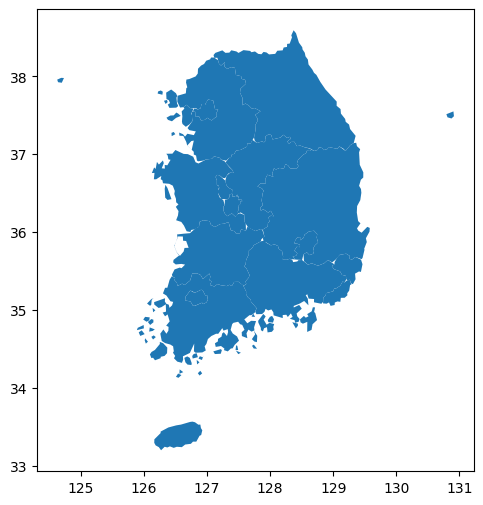

In [5]:
gdf_korea_sido.plot(figsize=(10,6)) # 데이터 plot하기

## geojson 데이터를 이용한 대한민국 지도 시각화

In [6]:
# 저장된 GeoJSON 파일 불러오기
import json # json 라이브러리 불러오기
with open('../streamlit/SIDO_MAP_2022.json', encoding='UTF-8') as f: #파일열기
    gdf_korea_sido = json.load(f) # 파일 읽기

# 데이터 출력하기(800자까지만 출력하기)
print(json.dumps(gdf_korea_sido, indent=4, ensure_ascii=False)[0:600])

{
    "type": "FeatureCollection",
    "name": "SIDO_MAP_2022",
    "crs": {
        "type": "name",
        "properties": {
            "name": "urn:ogc:def:crs:OGC:1.3:CRS84"
        }
    },
    "features": [
        {
            "type": "Feature",
            "properties": {
                "CTPRVN_CD": "11",
                "CTP_ENG_NM": "Seoul",
                "CTP_KOR_NM": "서울"
            },
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [
                            126.984,
                


geojson 파일을 Altair 데이터 형식으로 변환하기

In [7]:
import altair as alt # altair 라이브러리 불러오기
from pprint import pprint # pprint 라이브러리 불러오기

# 데이터를 altair에 맞게 변환하기
korea_vega = alt.Data(
    values=gdf_korea_sido,
    format=alt.DataFormat(property="features")
    )

# 데이터 출력하기(600자까지만출력하기)
pprint(korea_vega.to_dict(),depth=5)

{'format': {'property': 'features'},
 'values': {'crs': {'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'},
                    'type': 'name'},
            'features': [{'geometry': {'coordinates': [...], 'type': 'Polygon'},
                          'properties': {'CTPRVN_CD': '11',
                                         'CTP_ENG_NM': 'Seoul',
                                         'CTP_KOR_NM': '서울'},
                          'type': 'Feature'},
                         {'geometry': {'coordinates': [...], 'type': 'Polygon'},
                          'properties': {'CTPRVN_CD': '26',
                                         'CTP_ENG_NM': 'Busan',
                                         'CTP_KOR_NM': '부산'},
                          'type': 'Feature'},
                         {'geometry': {'coordinates': [...], 'type': 'Polygon'},
                          'properties': {'CTPRVN_CD': '27',
                                         'CTP_ENG_NM': 'Daegu',
                  

In [40]:
alt.Chart(korea_vega,title="대한민국지도").mark_geoshape().encode(
    color='properties.CTP_KOR_NM:N'
).project(type="identity",reflectY=True
).properties(
    width=500,height=400
)

alt.Chart(...)

## 시군구별(행정구역별) 합계출산율

In [9]:
import pandas as pd # pandas 라이브러리 불러오기
# 시군구별(행정구역별) 합계출산율 불러오기
df_korea_birth = pd.read_csv('../streamlit/연령별_출산율_및_합계출산율_행정구역별__20241121100821.csv', encoding='euc-kr', header=2)
df_korea_birth.head() # 데이터 출력하기

,전국,0.721,0.3,3.8,21.4,66.7,43.0,7.9,0.2
0,서울특별시,0.552,0.2,1.3,8.5,47.3,43.1,8.7,0.2
1,부산광역시,0.664,0.4,2.9,17.4,62.3,41.2,7.5,0.2
2,대구광역시,0.702,0.3,3.2,20.5,66.6,41.3,6.9,0.2
3,인천광역시,0.694,0.4,4.1,22.2,62.2,41.4,7.8,0.1
4,광주광역시,0.706,0.2,4.1,23.5,66.1,39.0,6.5,0.1


In [10]:
df_korea_birth=df_korea_birth[['전국','0.721']]

df_korea_birth.head()

,전국,0.721
0,서울특별시,0.552
1,부산광역시,0.664
2,대구광역시,0.702
3,인천광역시,0.694
4,광주광역시,0.706


In [11]:
# 새로운 컬럼명 지정
columns = ['행정구역별', '합계출산율']
df_korea_birth.columns = columns

df_korea_birth.head()

,행정구역별,합계출산율
0,서울특별시,0.552
1,부산광역시,0.664
2,대구광역시,0.702
3,인천광역시,0.694
4,광주광역시,0.706


In [12]:
# 특정 조건에 따라 변환
df_korea_birth['행정구역별'] = df_korea_birth['행정구역별'].replace({
    '충청남도': '충남',
    '충청북도': '충북',
    '전라남도': '전남',
    '전라북도': '전북',
    '경상남도': '경남',
    '경상북도': '경북'
})


In [13]:
df_korea_birth['행정구역'] = df_korea_birth['행정구역별'].str[:2]

df_korea_birth.head()

,행정구역별,합계출산율,행정구역
0,서울특별시,0.552,서울
1,부산광역시,0.664,부산
2,대구광역시,0.702,대구
3,인천광역시,0.694,인천
4,광주광역시,0.706,광주


In [14]:
import geopandas as gpd
gdf_korea_sido=gpd.read_file('../streamlit/SIDO_MAP_2022.json')
gdf_korea_sido.head()

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울,"POLYGON ((126.984 37.636, 126.948 37.657, 126...."
1,26,Busan,부산,"POLYGON ((129.288 35.321, 129.263 35.386, 129...."
2,27,Daegu,대구,"POLYGON ((128.473 35.833, 128.47 35.806, 128.4..."
3,28,Incheon,인천,"MULTIPOLYGON (((126.343 37.644, 126.375 37.669..."
4,29,Gwangju,광주,"POLYGON ((126.76 35.259, 126.736 35.251, 126.6..."


In [15]:
gdf_korea_sido['행정구역']=gdf_korea_sido['CTP_KOR_NM']

gdf_korea_sido.head()

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry,행정구역
0,11,Seoul,서울,"POLYGON ((126.984 37.636, 126.948 37.657, 126....",서울
1,26,Busan,부산,"POLYGON ((129.288 35.321, 129.263 35.386, 129....",부산
2,27,Daegu,대구,"POLYGON ((128.473 35.833, 128.47 35.806, 128.4...",대구
3,28,Incheon,인천,"MULTIPOLYGON (((126.343 37.644, 126.375 37.669...",인천
4,29,Gwangju,광주,"POLYGON ((126.76 35.259, 126.736 35.251, 126.6...",광주


In [16]:
print(df_korea_birth['행정구역'].unique())
print(gdf_korea_sido['행정구역'].unique())

['서울' '부산' '대구' '인천' '광주' '대전' '울산' '세종' '경기' '강원' '충북' '충남' '전북' '전남'
 '경북' '경남' '제주']
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '세종' '경기' '강원' '충북' '충남' '전북' '전남'
 '경북' '경남' '제주']


In [17]:
!pip install folium

In [18]:
import folium

In [38]:
import folium

# 대한민국 중심 좌표
Korea = [36.5, 127.5]

# 타이틀 설정
title = '시도별 출산율 지도'
title_html = f'<h3 align="center" style="font-size:20px"><b>{title}</b></h3>'

# 기본 지도 생성
sido_map = folium.Map(
    location=Korea,  # 대한민국 중심 좌표
    zoom_start=7,    # 전국 확대 정도
    tiles='cartodbpositron'
)

# 제목 추가
sido_map.get_root().html.add_child(folium.Element(title_html))

# Choropleth 맵 추가
folium.Choropleth(
    geo_data=gdf_korea_sido,  # GeoJSON 파일
    data=df_korea_birth,      # 데이터프레임
    columns=('행정구역', '합계출산율'),  # Choropleth 매핑에 사용할 열
    key_on='feature.properties.행정구역',  # GeoJSON의 속성과 매핑
    fill_color='BuPu',        # 색상 Blue-Purple
    fill_opacity=0.7,         # 채우기 투명도
    line_opacity=0.5,         # 경계선 투명도
    legend_name='시도별 출산율'  # 범례 이름
).add_to(sido_map)

# 지도 출력
sido_map
